In [310]:
import pandas as pd
import numpy  as np
import csv 

I'm going to import data on Russian tweets to look for trends in the usage of certain politically provocative terms 
I want to identify tweets that were more successful. I will do this with a dummy variable labeling tweets with a "1" if they 
have a certain number of retweets 


In [315]:
russian_tweets = pd.read_csv(r"C:\Users\owner\Documents\Junior\S2\Machine_Learning\tweets.csv")
russian_tweets['popular']= np.where(russian_tweets['favorite_count']>= 10, 1, 0)

In [316]:
#to flag politically provocative terms, I will use a loop to look through the text of each tweet and flag it with a binary 
#variable if the term of interest is included.
russian_tweets['trump']=0
russian_tweets['clinton']=0
russian_tweets['gun']=0
russian_tweets['mexico']=0
for i in range(russian_tweets.shape[0]):
    if 'Trump' in russian_tweets['text'][i]:
        russian_tweets['trump'][i]=1
    if 'Clinton' in russian_tweets['text'][i]:
        russian_tweets['clinton'][i]=1
    if 'Gun' in russian_tweets['text'][i]:
        russian_tweets['gun'][i]=1
    if 'Mexico' in russian_tweets['text'][i]:
        russian_tweets['mexico'][i]=1
    print(i)

0


C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74


C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
3

C:\Users\owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
765
766
767
768
769
770
771
772
773
774
775
776
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799
800
801
802
803
804
805
806
807
808
809
810
811
812
813
814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
839
840
841
842
843
844
845
846
847
848
849
850
851
852
853
854
855
856
857
858
859
860
861
862
863
864
865
866
867
868
869
870
871
872
873
874
875
876
877
878
879
880
881
882
883
884
885
886
887
888
889
890
891
892
893
894
895
896
897
898
899
900
901
902
903
904
905
906
907
908
909
910
911
912
913


2406
2407
2408
2409
2410
2411
2412
2413
2414
2415
2416
2417
2418
2419
2420
2421
2422
2423
2424
2425
2426
2427
2428
2429
2430
2431
2432
2433
2434
2435
2436
2437
2438
2439
2440
2441
2442
2443
2444
2445
2446
2447
2448
2449
2450
2451
2452
2453
2454
2455
2456
2457
2458
2459
2460
2461
2462
2463
2464
2465
2466
2467
2468
2469
2470
2471
2472
2473
2474
2475
2476
2477
2478
2479
2480
2481
2482
2483
2484
2485
2486
2487
2488
2489
2490
2491
2492
2493
2494
2495
2496
2497
2498
2499
2500
2501
2502
2503
2504
2505
2506
2507
2508
2509
2510
2511
2512
2513
2514
2515
2516
2517
2518
2519
2520
2521
2522
2523
2524
2525
2526
2527
2528
2529
2530
2531
2532
2533
2534
2535
2536
2537
2538
2539
2540
2541
2542
2543
2544
2545
2546
2547
2548
2549
2550
2551
2552
2553
2554
2555
2556
2557
2558
2559
2560
2561
2562
2563
2564
2565
2566
2567
2568
2569
2570
2571
2572
2573
2574
2575
2576
2577
2578
2579
2580
2581
2582
2583
2584
2585
2586
2587
2588
2589
2590
2591
2592
2593
2594
2595
2596
2597
2598
2599
2600
2601
2602
2603
2604
2605


4083
4084
4085
4086
4087
4088
4089
4090
4091
4092
4093
4094
4095
4096
4097
4098
4099
4100
4101
4102
4103
4104
4105
4106
4107
4108
4109
4110
4111
4112
4113
4114
4115
4116
4117
4118
4119
4120
4121
4122
4123
4124
4125
4126
4127
4128
4129
4130
4131
4132
4133
4134
4135
4136
4137
4138
4139
4140
4141
4142
4143
4144
4145
4146
4147
4148
4149
4150
4151
4152
4153
4154
4155
4156
4157
4158
4159
4160
4161
4162
4163
4164
4165
4166
4167
4168
4169
4170
4171
4172
4173
4174
4175
4176
4177
4178
4179
4180
4181
4182
4183
4184
4185
4186
4187
4188
4189
4190
4191
4192
4193
4194
4195
4196
4197
4198
4199
4200
4201
4202
4203
4204
4205
4206
4207
4208
4209
4210
4211
4212
4213
4214
4215
4216
4217
4218
4219
4220
4221
4222
4223
4224
4225
4226
4227
4228
4229
4230
4231
4232
4233
4234
4235
4236
4237
4238
4239
4240
4241
4242
4243
4244
4245
4246
4247
4248
4249
4250
4251
4252
4253
4254
4255
4256
4257
4258
4259
4260
4261
4262
4263
4264
4265
4266
4267
4268
4269
4270
4271
4272
4273
4274
4275
4276
4277
4278
4279
4280
4281
4282


5750
5751
5752
5753
5754
5755
5756
5757
5758
5759
5760
5761
5762
5763
5764
5765
5766
5767
5768
5769
5770
5771
5772
5773
5774
5775
5776
5777
5778
5779
5780
5781
5782
5783
5784
5785
5786
5787
5788
5789
5790
5791
5792
5793
5794
5795
5796
5797
5798
5799
5800
5801
5802
5803
5804
5805
5806
5807
5808
5809
5810
5811
5812
5813
5814
5815
5816
5817
5818
5819
5820
5821
5822
5823
5824
5825
5826
5827
5828
5829
5830
5831
5832
5833
5834
5835
5836
5837
5838
5839
5840
5841
5842
5843
5844
5845
5846
5847
5848
5849
5850
5851
5852
5853
5854
5855
5856
5857
5858
5859
5860
5861
5862
5863
5864
5865
5866
5867
5868
5869
5870
5871
5872
5873
5874
5875
5876
5877
5878
5879
5880
5881
5882
5883
5884
5885
5886
5887
5888
5889
5890
5891
5892
5893
5894
5895
5896
5897
5898
5899
5900
5901
5902
5903
5904
5905
5906
5907
5908
5909
5910
5911
5912
5913
5914
5915
5916
5917
5918
5919
5920
5921
5922
5923
5924
5925
5926
5927
5928
5929
5930
5931
5932
5933
5934
5935
5936
5937
5938
5939
5940
5941
5942
5943
5944
5945
5946
5947
5948
5949


7479
7480
7481
7482
7483
7484
7485
7486
7487
7488
7489
7490
7491
7492
7493
7494
7495
7496
7497
7498
7499
7500
7501
7502
7503
7504
7505
7506
7507
7508
7509
7510
7511
7512
7513
7514
7515
7516
7517
7518
7519
7520
7521
7522
7523
7524
7525
7526
7527
7528
7529
7530
7531
7532
7533
7534
7535
7536
7537
7538
7539
7540
7541
7542
7543
7544
7545
7546
7547
7548
7549
7550
7551
7552
7553
7554
7555
7556
7557
7558
7559
7560
7561
7562
7563
7564
7565
7566
7567
7568
7569
7570
7571
7572
7573
7574
7575
7576
7577
7578
7579
7580
7581
7582
7583
7584
7585
7586
7587
7588
7589
7590
7591
7592
7593
7594
7595
7596
7597
7598
7599
7600
7601
7602
7603
7604
7605
7606
7607
7608
7609
7610
7611
7612
7613
7614
7615
7616
7617
7618
7619
7620
7621
7622
7623
7624
7625
7626
7627
7628
7629
7630
7631
7632
7633
7634
7635
7636
7637
7638
7639
7640
7641
7642
7643
7644
7645
7646
7647
7648
7649
7650
7651
7652
7653
7654
7655
7656
7657
7658
7659
7660
7661
7662
7663
7664
7665
7666
7667
7668
7669
7670
7671
7672
7673
7674
7675
7676
7677
7678


9315
9316
9317
9318
9319
9320
9321
9322
9323
9324
9325
9326
9327
9328
9329
9330
9331
9332
9333
9334
9335
9336
9337
9338
9339
9340
9341
9342
9343
9344
9345
9346
9347
9348
9349
9350
9351
9352
9353
9354
9355
9356
9357
9358
9359
9360
9361
9362
9363
9364
9365
9366
9367
9368
9369
9370
9371
9372
9373
9374
9375
9376
9377
9378
9379
9380
9381
9382
9383
9384
9385
9386
9387
9388
9389
9390
9391
9392
9393
9394
9395
9396
9397
9398
9399
9400
9401
9402
9403
9404
9405
9406
9407
9408
9409
9410
9411
9412
9413
9414
9415
9416
9417
9418
9419
9420
9421
9422
9423
9424
9425
9426
9427
9428
9429
9430
9431
9432
9433
9434
9435
9436
9437
9438
9439
9440
9441
9442
9443
9444
9445
9446
9447
9448
9449
9450
9451
9452
9453
9454
9455
9456
9457
9458
9459
9460
9461
9462
9463
9464
9465
9466
9467
9468
9469
9470
9471
9472
9473
9474
9475
9476
9477
9478
9479
9480
9481
9482
9483
9484
9485
9486
9487
9488
9489
9490
9491
9492
9493
9494
9495
9496
9497
9498
9499
9500
9501
9502
9503
9504
9505
9506
9507
9508
9509
9510
9511
9512
9513
9514


10814
10815
10816
10817
10818
10819
10820
10821
10822
10823
10824
10825
10826
10827
10828
10829
10830
10831
10832
10833
10834
10835
10836
10837
10838
10839
10840
10841
10842
10843
10844
10845
10846
10847
10848
10849
10850
10851
10852
10853
10854
10855
10856
10857
10858
10859
10860
10861
10862
10863
10864
10865
10866
10867
10868
10869
10870
10871
10872
10873
10874
10875
10876
10877
10878
10879
10880
10881
10882
10883
10884
10885
10886
10887
10888
10889
10890
10891
10892
10893
10894
10895
10896
10897
10898
10899
10900
10901
10902
10903
10904
10905
10906
10907
10908
10909
10910
10911
10912
10913
10914
10915
10916
10917
10918
10919
10920
10921
10922
10923
10924
10925
10926
10927
10928
10929
10930
10931
10932
10933
10934
10935
10936
10937
10938
10939
10940
10941
10942
10943
10944
10945
10946
10947
10948
10949
10950
10951
10952
10953
10954
10955
10956
10957
10958
10959
10960
10961
10962
10963
10964
10965
10966
10967
10968
10969
10970
10971
10972
10973
10974
10975
10976
10977
10978
10979
1098

12303
12304
12305
12306
12307
12308
12309
12310
12311
12312
12313
12314
12315
12316
12317
12318
12319
12320
12321
12322
12323
12324
12325
12326
12327
12328
12329
12330
12331
12332
12333
12334
12335
12336
12337
12338
12339
12340
12341
12342
12343
12344
12345
12346
12347
12348
12349
12350
12351
12352
12353
12354
12355
12356
12357
12358
12359
12360
12361
12362
12363
12364
12365
12366
12367
12368
12369
12370
12371
12372
12373
12374
12375
12376
12377
12378
12379
12380
12381
12382
12383
12384
12385
12386
12387
12388
12389
12390
12391
12392
12393
12394
12395
12396
12397
12398
12399
12400
12401
12402
12403
12404
12405
12406
12407
12408
12409
12410
12411
12412
12413
12414
12415
12416
12417
12418
12419
12420
12421
12422
12423
12424
12425
12426
12427
12428
12429
12430
12431
12432
12433
12434
12435
12436
12437
12438
12439
12440
12441
12442
12443
12444
12445
12446
12447
12448
12449
12450
12451
12452
12453
12454
12455
12456
12457
12458
12459
12460
12461
12462
12463
12464
12465
12466
12467
12468
1246

13807
13808
13809
13810
13811
13812
13813
13814
13815
13816
13817
13818
13819
13820
13821
13822
13823
13824
13825
13826
13827
13828
13829
13830
13831
13832
13833
13834
13835
13836
13837
13838
13839
13840
13841
13842
13843
13844
13845
13846
13847
13848
13849
13850
13851
13852
13853
13854
13855
13856
13857
13858
13859
13860
13861
13862
13863
13864
13865
13866
13867
13868
13869
13870
13871
13872
13873
13874
13875
13876
13877
13878
13879
13880
13881
13882
13883
13884
13885
13886
13887
13888
13889
13890
13891
13892
13893
13894
13895
13896
13897
13898
13899
13900
13901
13902
13903
13904
13905
13906
13907
13908
13909
13910
13911
13912
13913
13914
13915
13916
13917
13918
13919
13920
13921
13922
13923
13924
13925
13926
13927
13928
13929
13930
13931
13932
13933
13934
13935
13936
13937
13938
13939
13940
13941
13942
13943
13944
13945
13946
13947
13948
13949
13950
13951
13952
13953
13954
13955
13956
13957
13958
13959
13960
13961
13962
13963
13964
13965
13966
13967
13968
13969
13970
13971
13972
1397

15303
15304
15305
15306
15307
15308
15309
15310
15311
15312
15313
15314
15315
15316
15317
15318
15319
15320
15321
15322
15323
15324
15325
15326
15327
15328
15329
15330
15331
15332
15333
15334
15335
15336
15337
15338
15339
15340
15341
15342
15343
15344
15345
15346
15347
15348
15349
15350
15351
15352
15353
15354
15355
15356
15357
15358
15359
15360
15361
15362
15363
15364
15365
15366
15367
15368
15369
15370
15371
15372
15373
15374
15375
15376
15377
15378
15379
15380
15381
15382
15383
15384
15385


TypeError: argument of type 'float' is not iterable

In [417]:
russian_tweets['text'][15385]

'RT @realDonaldTrump: #CrookedHillary has FAILED all over the world! \U0010fc00 \n#BigLeagueTruth #Debates2016 https://t.co/dalk9JKcFg'

In [364]:
import datetime
russian_tweets['date'] = pd.to_datetime(russian_tweets['created_str'])
russian_tweets['Year-Week'] = russian_tweets['date'].dt.strftime('%Y-%U')
russian_tweets['count']=1

In [393]:
#I want to sum up the number of tweets with a key term for each week so I can monitor the trends 
russian_tweets1=russian_tweets.groupby([(russian_tweets['Year-Week'])]).sum()
russian_tweets1 = russian_tweets1.reset_index()
russian_tweets1

,Year-Week,user_id,created_at,retweet_count,favorite_count,tweet_id,retweeted_status_id,in_reply_to_status_id,popular,trump,clinton,gun,mexico,count
0,2014-28,5.031645e+09,2.810990e+12,0.0,0.0,9.786151e+17,0.000000e+00,0.0,0,0,0,0,0,2
1,2014-29,2.019116e+10,1.124858e+13,0.0,0.0,3.933858e+18,0.000000e+00,0.0,0,0,0,0,0,8
2,2014-30,5.031645e+09,2.813203e+12,0.0,0.0,9.878956e+17,0.000000e+00,0.0,0,0,0,0,0,2
3,2014-31,2.533654e+09,1.407130e+12,0.0,0.0,4.961659e+17,0.000000e+00,0.0,0,0,0,0,0,1
4,2014-37,1.657754e+09,1.410966e+12,0.0,0.0,5.122558e+17,0.000000e+00,0.0,0,0,0,0,0,1
5,2014-44,7.622646e+09,4.245794e+12,0.0,0.0,1.590855e+18,0.000000e+00,0.0,0,0,0,0,0,3
6,2014-45,4.463929e+11,2.491487e+14,0.0,0.0,9.359050e+19,0.000000e+00,0.0,0,0,0,0,0,176
7,2014-46,4.053846e+10,2.266347e+13,0.0,0.0,8.565246e+18,0.000000e+00,0.0,0,0,0,0,0,16
8,2014-47,4.889951e+11,2.734954e+14,0.0,0.0,1.038101e+20,0.000000e+00,0.0,0,0,0,0,0,193
9,2014-48,1.498788e+11,9.781691e+13,0.0,0.0,3.673515e+19,0.000000e+00,0.0,0,0,0,0,0,69


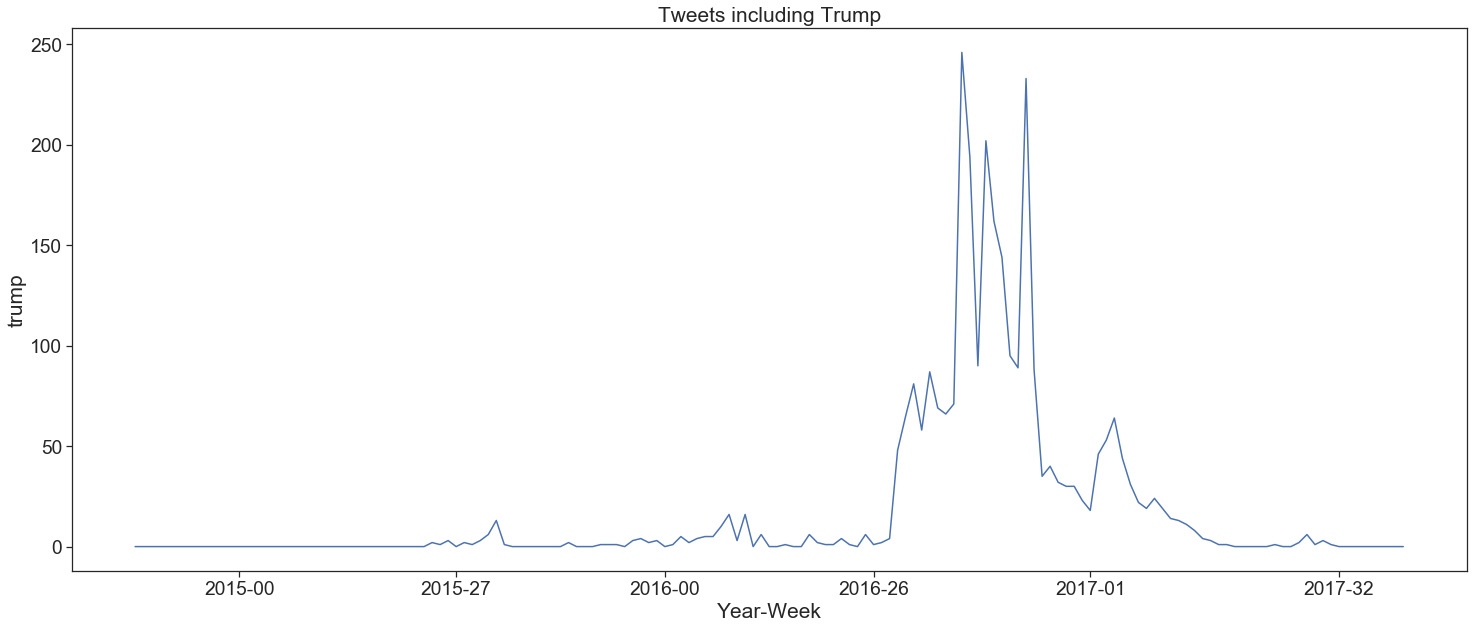

In [396]:
f, ax = plt.subplots(figsize=(25,10))
sns.set(font_scale=1.75)
sns.set_style("white")
sns.set_style("ticks")
plt.xticks([13, 40, 66, 92, 119, 150])
trump_plot=sns.lineplot(x="Year-Week", y="trump", data=russian_tweets1).set_title("Tweets including Trump")

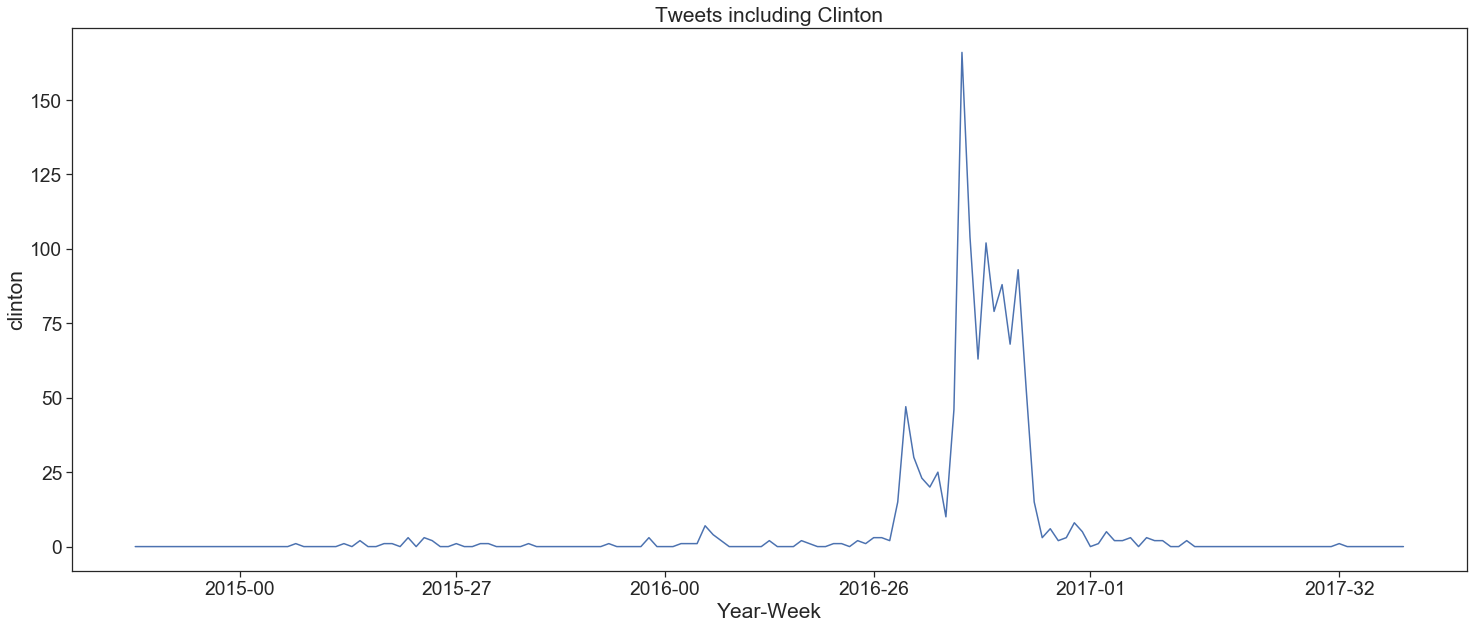

In [397]:
f, ax = plt.subplots(figsize=(25,10))
sns.set(font_scale=1.75)
sns.set_style("white")
sns.set_style("ticks")
plt.xticks([13, 40, 66, 92, 119, 150])
clinton_plot=sns.lineplot(x="Year-Week", y="clinton", data=russian_tweets1).set_title("Tweets including Clinton")

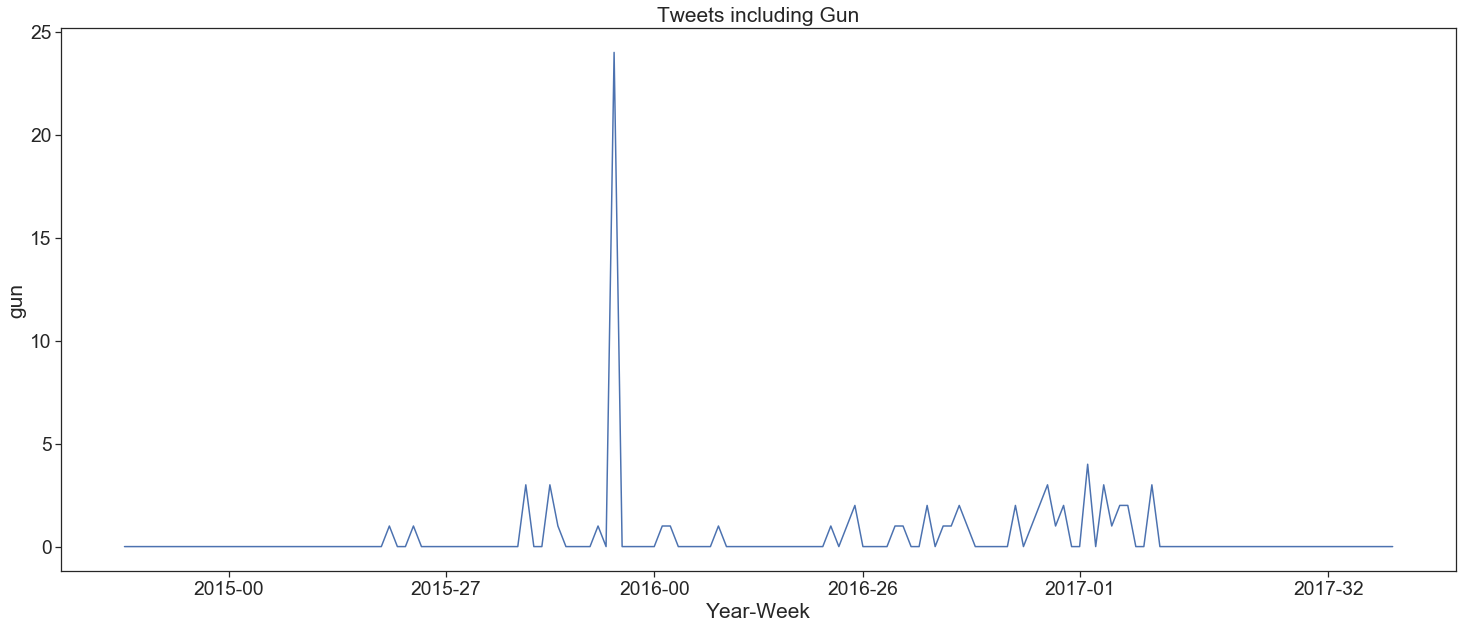

In [398]:
f, ax = plt.subplots(figsize=(25,10))
sns.set(font_scale=1.75)
sns.set_style("white")
sns.set_style("ticks")
plt.xticks([13, 40, 66, 92, 119, 150])
guns_plot=sns.lineplot(x="Year-Week", y="gun", data=russian_tweets1).set_title("Tweets including Gun")

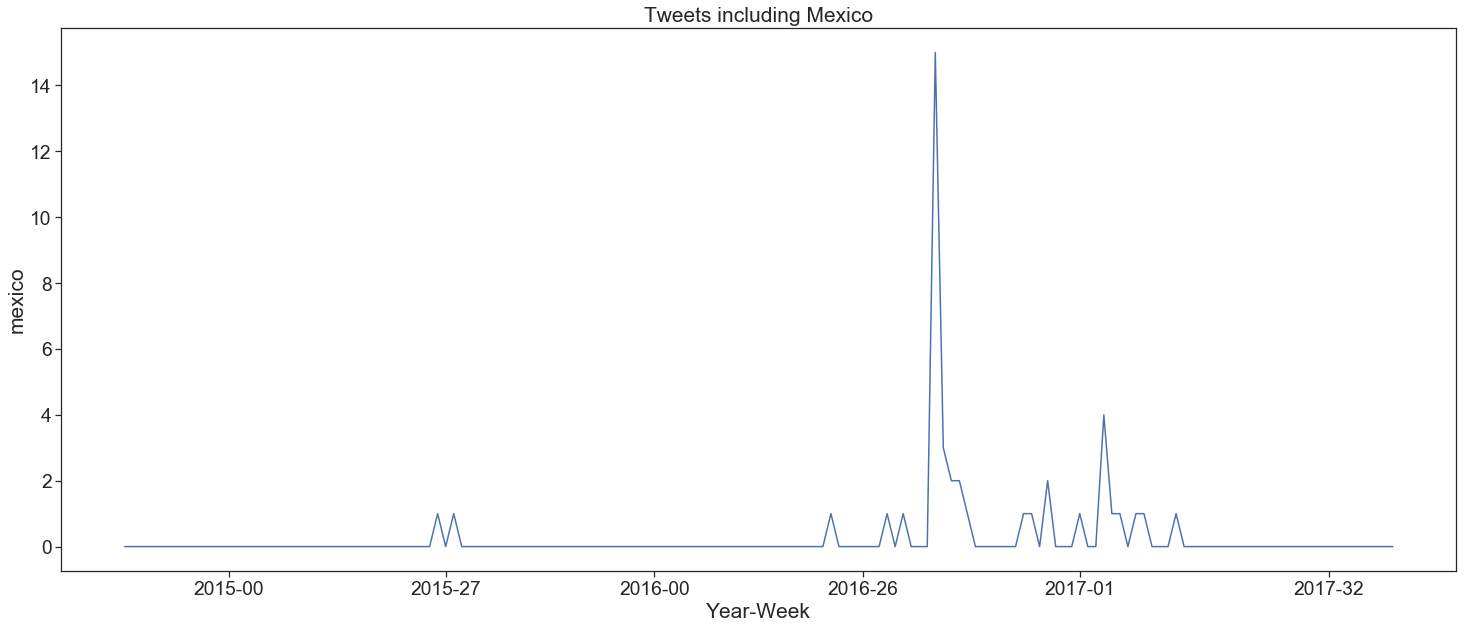

In [399]:
f, ax = plt.subplots(figsize=(25,10))
sns.set(font_scale=1.75)
sns.set_style("white")
sns.set_style("ticks")
plt.xticks([13, 40, 66, 92, 119, 150])
mexico_plot=sns.lineplot(x="Year-Week", y="mexico", data=russian_tweets1).set_title("Tweets including Mexico")

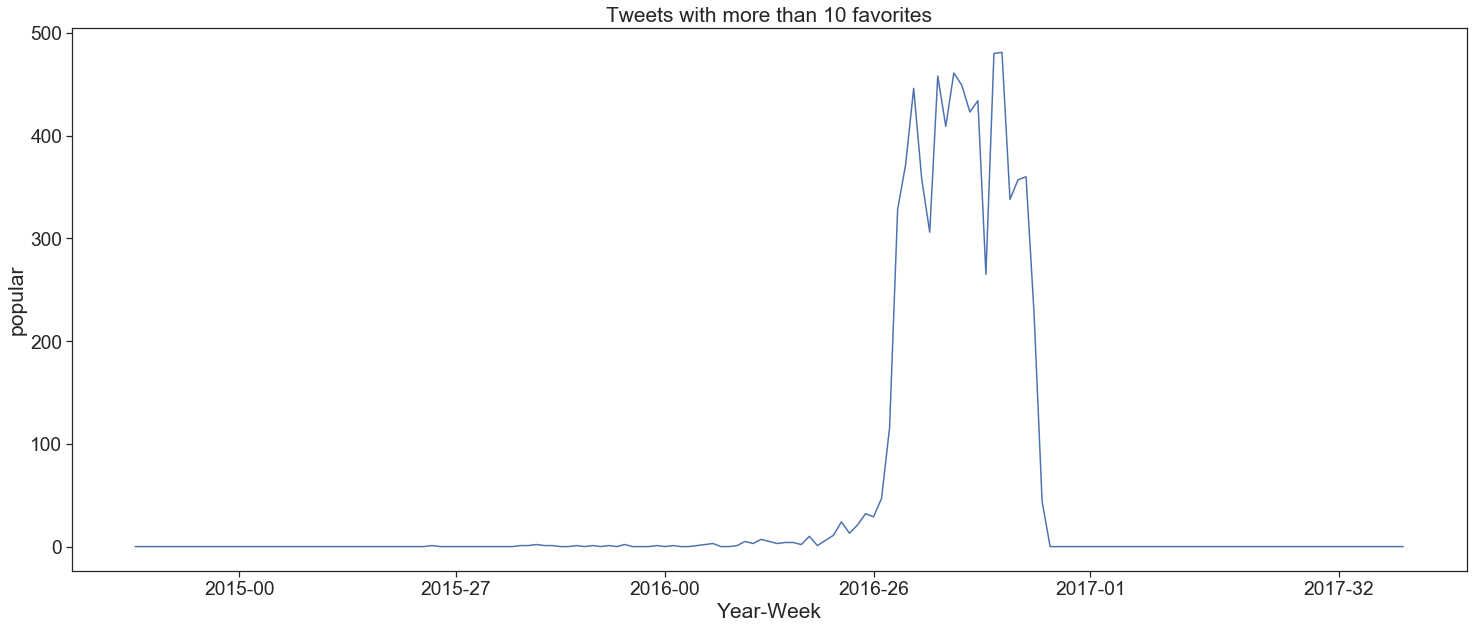

In [400]:
f, ax = plt.subplots(figsize=(25,10))
sns.set(font_scale=1.75)
sns.set_style("white")
sns.set_style("ticks")
plt.xticks([13, 40, 66, 92, 119, 150])
popular_plot=sns.lineplot(x="Year-Week", y="popular", data=russian_tweets1).set_title("Tweets with more than 10 favorites")

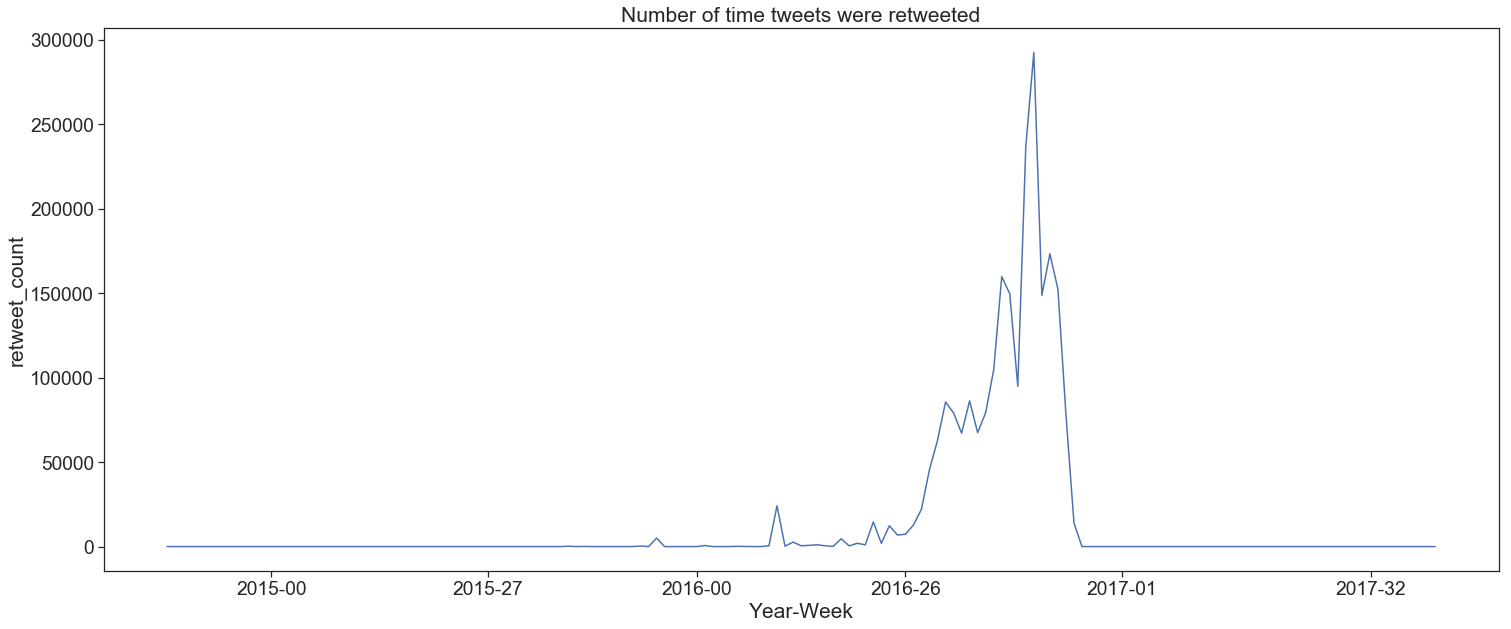

In [402]:
f, ax = plt.subplots(figsize=(25,10))
sns.set(font_scale=1.75)
sns.set_style("white")
sns.set_style("ticks")
plt.xticks([13, 40, 66, 92, 119, 150])
popular_plot=sns.lineplot(x="Year-Week", y="retweet_count", data=russian_tweets1).set_title("Number of time tweets were retweeted")

f, ax = plt.subplots(figsize=(25,10))
sns.set(font_scale=1.75)
sns.set_style("white")
sns.set_style("ticks")
plt.xticks([13, 40, 66, 92, 119, 150])
Count_plot=sns.lineplot(x="Year-Week", y="count", data=russian_tweets1).set_title("Total Number of Tweets")

Russian tweets sparked in both number and popularity in the weeks leading up to the 2016 election. After the election, the 
general popularity of tweets and the "clinton" tweets dropped off fairly quickly, while the Trump tweets still had activity. 
Tweets about guns noticibly spiked after the Las Vegas shooting in October of 2015, which makes sense considering the tweets
are meant to stir up political anger and the controversial "guns" topic increases in intencity after a major shooting. 
Tweets about Mexico seems to noticibly spike during early election season. 

Next I will be looking a red wheat price index to try and find patterns 

In [424]:
import json 
import requests 
my_data= requests.get("https://www.quandl.com/api/v3/datasets/CHRIS/MGEX_IH1.json?api_key=syhrpaCx6b3Q_bwszsrU")

In [427]:
price_dict=json.loads(my_data.text)

In [428]:
price_dict.keys()

dict_keys(['dataset'])

In [429]:
dfPrice=pd.DataFrame(price_dict['dataset']['data'])
dfPrice.head()


,0,1,2,3,4,5,6
0,2019-01-30,NaN,488.0,488.0,488.0,0.0,0.0
1,2019-01-29,NaN,487.0,487.0,487.0,0.0,0.0
2,2019-01-28,NaN,492.0,492.0,492.0,0.0,0.0
3,2019-01-25,NaN,494.0,494.0,494.0,0.0,0.0
4,2019-01-24,NaN,494.0,494.0,494.0,0.0,0.0


In [430]:
dfPrice=dfPrice.rename(columns={0: "date", 3: "price"})

In [431]:
import datetime
dfPrice['date'] = pd.to_datetime(dfPrice['date'])
dfPrice['year']=dfPrice['date'].dt.year
dfPrice['month']=dfPrice['date'].dt.month


In [432]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [433]:
dfPrice1=dfPrice.groupby([(dfPrice['year']),(dfPrice['month'])]).mean()
dfPrice1.head()

1           2       price           4     5         6  \
year month                                                                   
2005 1      321.812500  321.887500  321.725000  321.800000  0.15  9.150000   
     2      314.986842  314.986842  314.986842  314.986842  0.00  7.578947   
     3      331.000000  331.000000  331.000000  331.000000  0.00  0.954545   
     4      302.690476  302.690476  302.690476  302.690476  0.00  0.952381   
     5      312.404762  312.404762  312.404762  312.404762  0.00  0.000000   

            year  month  
year month               
2005 1      2005      1  
     2      2005      2  
     3      2005      3  
     4      2005      4  
     5      2005      5

First I will be looking at a heat map to identify areas of more price intencity 

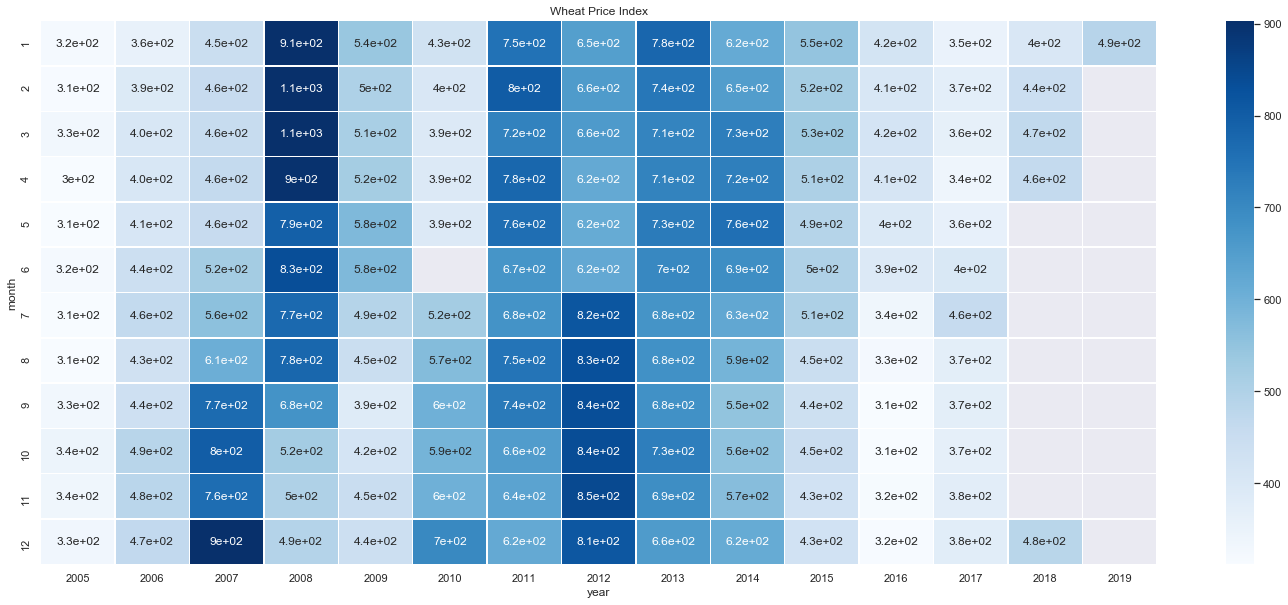

In [445]:
prices = dfPrice1.pivot("month", "year", "price")
f, ax = plt.subplots(figsize=(25,10))
sns.set(font_scale=1)
Wheat_prices=sns.heatmap(prices, annot=True, linewidths=.5, ax=ax, robust=True, cmap='Blues').set_title("Wheat Price Index")

From the heat map, it is clear that late 2007 through early 2008 period had the highest wheat prices. From the heat map 
alone, there doesn't seem to be a systematic month that has higher or lower prices; rather it seems that the prices have a 
more incremental change from period to period, so a line graph may be useful. 

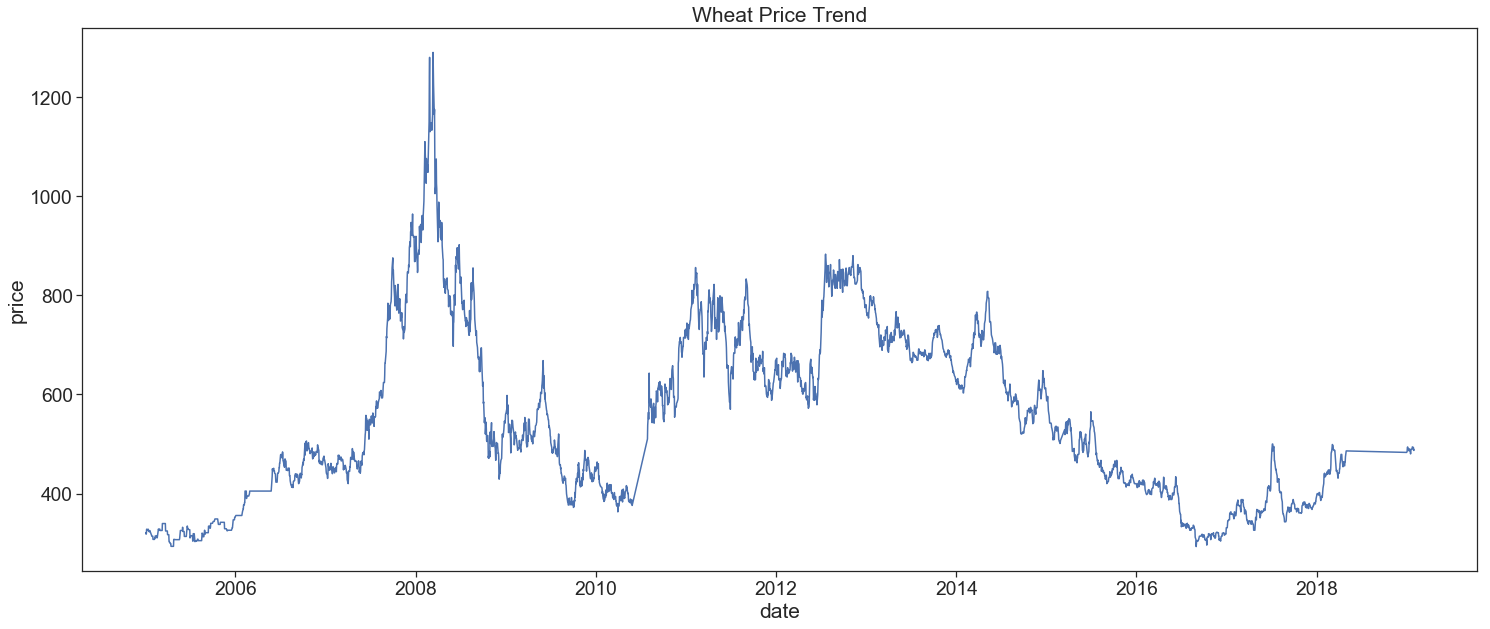

In [449]:
f, ax = plt.subplots(figsize=(25,10))
sns.set(font_scale=1.75)
sns.set_style("white")
sns.set_style("ticks")
Wheat_Price_Trend=sns.lineplot(x='date', y='price', data=dfPrice).set_title("Wheat Price Trend")

The line graph confirms that the prices in period "t" are very related to the prices in period "t-1", which makes sense. The
trends actually don't appear seasonal, or even yearly. The trends in wheat prices don't seem to have a set pattern and span
a couple years.

For my last graph, I will be looking at SQL data scrapped from accounts started on a rock climbing page for "route setters"
Climbers who are "route setters" are usually very advanced in their skills and tecniques, and dedicate a lot of time to 
the sport. This will make them particularly interesting to investigate. I want to look at country and gender trends. 

In [371]:
import sqlite3 

In [372]:
conn=sqlite3.connect(r"C:\Users\owner\Documents\Junior\S2\Machine_Learning\database.sqlite")

In [374]:
dfClimber=pd.read_sql_query("select * from user;", conn)
dfClimber.head()

,id,first_name,last_name,city,country,sex,height,weight,started,competitions,...,sponsor2,sponsor3,best_area,worst_area,guide_area,interests,birth,presentation,deactivated,anonymous
0,1,first,last,Göteborg,SWE,0,177,73,1996,,...,,,"Railay beach, Krabi, Thailand",None,,,1976-03-10,,0,0
1,2,first,last,stockholm,SWE,0,0,0,2000,,...,,,,,,,None,,0,0
2,3,first,last,Umeå,SWE,0,180,78,1995,,...,,,Hell,Umeå,,,1973-09-09,,0,0
3,4,first,last,Goteborg,SWE,1,165,58,2001,,...,,,,None,,,1984-07-26,,0,0
4,5,first,last,North Attleboro,USA,0,0,0,1991,,...,,,,None,,,1969-05-07,,0,0


In [375]:
dfClimber['count']=1

In [376]:
climbtable= pd.pivot_table(dfClimber, values='count', index=['country'], aggfunc=np.sum)

I only want to look at the countries that have the most climbers so I can get a better feel for the trends overtime.

In [377]:
climbtable.sort_values(by=['count'])

,count
country,
SGS,1
MWI,1
MOZ,1
BTN,1
MLI,1
MHL,1
CCK,1
GNQ,1
VAT,1


Seeing which countries are the most popular on this rock climbing site, I'm going to redraw from the SQL database to only 
get my countries of interest. 
I also want to get the average for sex and weight so I can look at the percentage of female climbers and the average weight of a given country of climbers in a year.


In [378]:
dfClimber2=pd.read_sql_query("select * from user where country='USA' or country='ESP' or country='DEU' or country='SWE' or country='ITA';", conn)
dfClimber2.head()

,id,first_name,last_name,city,country,sex,height,weight,started,competitions,...,sponsor2,sponsor3,best_area,worst_area,guide_area,interests,birth,presentation,deactivated,anonymous
0,1,first,last,Göteborg,SWE,0,177,73,1996,,...,,,"Railay beach, Krabi, Thailand",None,,,1976-03-10,,0,0
1,2,first,last,stockholm,SWE,0,0,0,2000,,...,,,,,,,None,,0,0
2,3,first,last,Umeå,SWE,0,180,78,1995,,...,,,Hell,Umeå,,,1973-09-09,,0,0
3,4,first,last,Goteborg,SWE,1,165,58,2001,,...,,,,None,,,1984-07-26,,0,0
4,5,first,last,North Attleboro,USA,0,0,0,1991,,...,,,,None,,,1969-05-07,,0,0


In [379]:
dfClimber2['count']=1
dfClimber_means=dfClimber2.groupby([(dfClimber2['country']),(dfClimber2['started'])]).mean()

I also want to track the number of climbers setting up an account from each country in each year and I'm going to combine the number of climbers from each country and year with the averages. Then, like I only wanted to use the countries with the most observations, I only want to use the years with the most observations. Finally, I'm going to take out the years that are obviously wrong, (anything "started" in the future), and the years that had too few observations 

In [380]:
dfClimber_sums=dfClimber2.groupby([(dfClimber2['country']),(dfClimber2['started'])]).sum()

In [385]:
dfClimber_means['number']=dfClimber_sums['count']

In [439]:
climbtable2= pd.pivot_table(dfClimber_means, values='number', index=['started'], aggfunc=np.sum)
climbtable2

,number
started,
1996,248
1997,250
1998,301
1999,390
2000,1746
2001,504
2002,554
2003,597
2004,740


In [384]:
dfClimber_means=dfClimber_means[dfClimber_means.started>1995]
dfClimber_means=dfClimber_means[dfClimber_means.started<2015]

In [388]:
dfClimber_means.columns
dfClimber_means.columns = ['id', 'sex', 'height', 'weight', 'drop', 'deactivated', 'anonymous', 'count', 'number']

In [440]:
dfClimber_means = dfClimber_means.reset_index()
dfClimber_means.head()

,index,country,started,id,sex,height,weight,drop,deactivated,anonymous,count,number
0,0,DEU,1996,28227.470588,0.088235,150.500000,53.235294,1996.0,0.088235,0.0,1.0,34
1,1,DEU,1997,26036.352941,0.176471,117.764706,43.411765,1997.0,0.000000,0.0,1.0,17
2,2,DEU,1998,24388.583333,0.125000,124.541667,49.083333,1998.0,0.000000,0.0,1.0,24
3,3,DEU,1999,27294.522727,0.204545,147.659091,50.318182,1999.0,0.136364,0.0,1.0,44
4,4,DEU,2000,19691.045161,0.109677,107.070968,36.593548,2000.0,0.045161,0.0,1.0,155


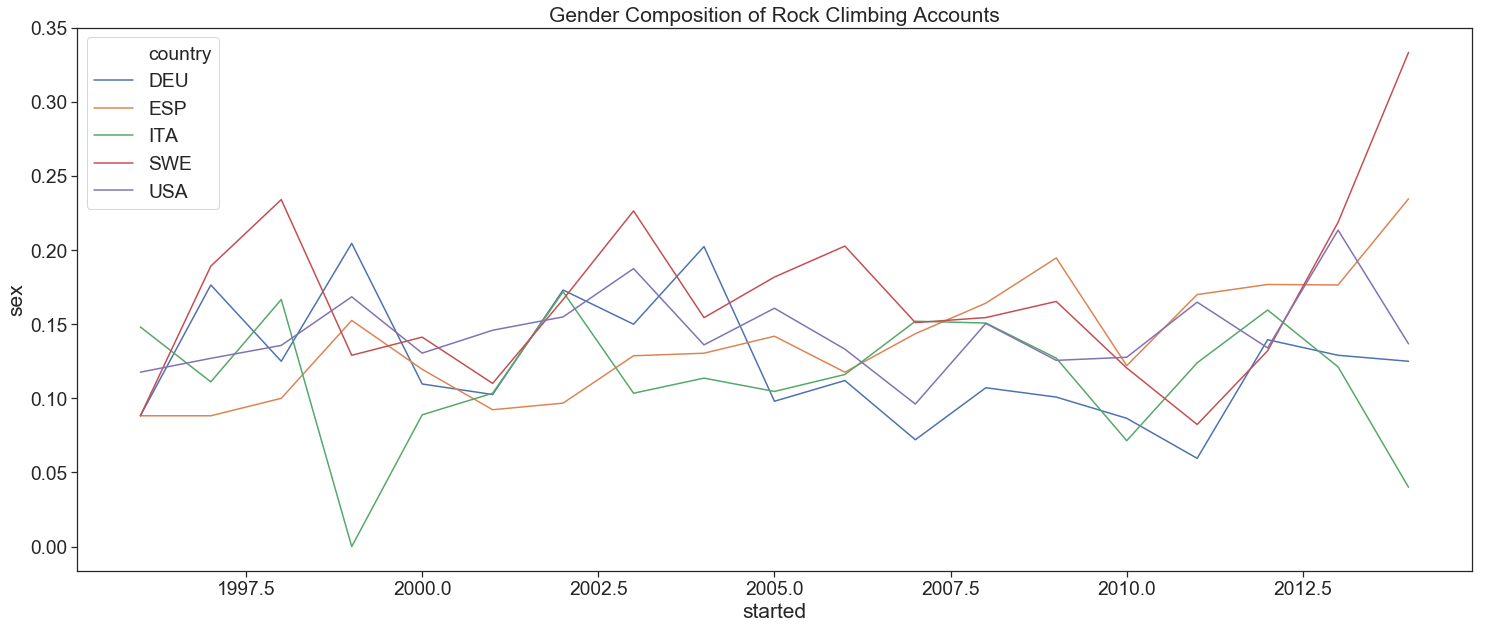

In [448]:
f, ax = plt.subplots(figsize=(25,10))
sns.set(font_scale=1.75)
sns.set_style("white")
sns.set_style("ticks")
gender_trend=sns.lineplot(x="started", y="sex", hue = 'country', data=dfClimber_means).set_title("Gender Composition of Rock Climbing Accounts")

From the above chart it is clear to see that gender composition of new accounts has been relatively stable, even across countries
between 1995 and 2015. It has mostly stayed between 8% and 25% female. 

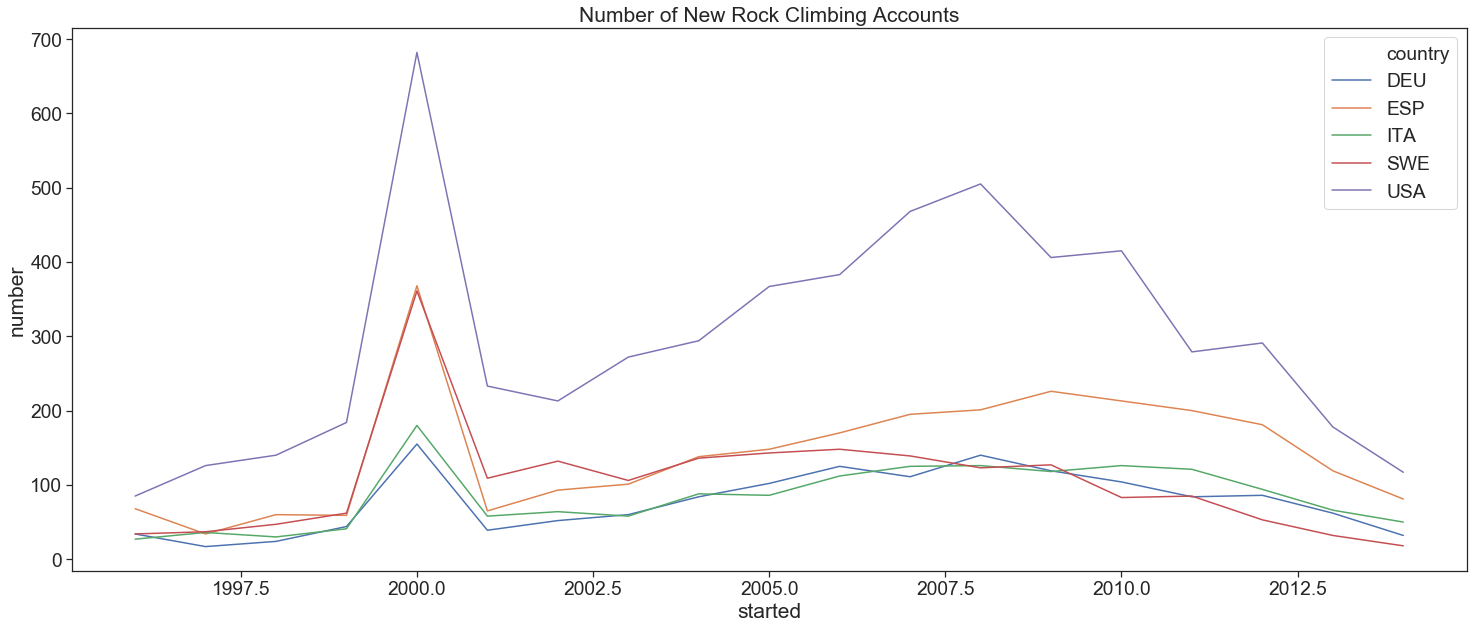

In [447]:
f, ax = plt.subplots(figsize=(25,10))
sns.set(font_scale=1.75)
sns.set_style("white")
sns.set_style("ticks")
Application_trend=sns.lineplot(x="started", y="number", hue = 'country', data=dfClimber_means).set_title("Number of New Rock Climbing Accounts")

The USA has been clearly the most active country in creating new accounts. ALl accounts seem to follow the same general trend; 
account creations spiked in 2000, felt, started to recover, and have been trending downwards since mid-2007. 
I am not sure what caused the spike in 2000, but it would be worth looking into if this dataset was going to be used in the future

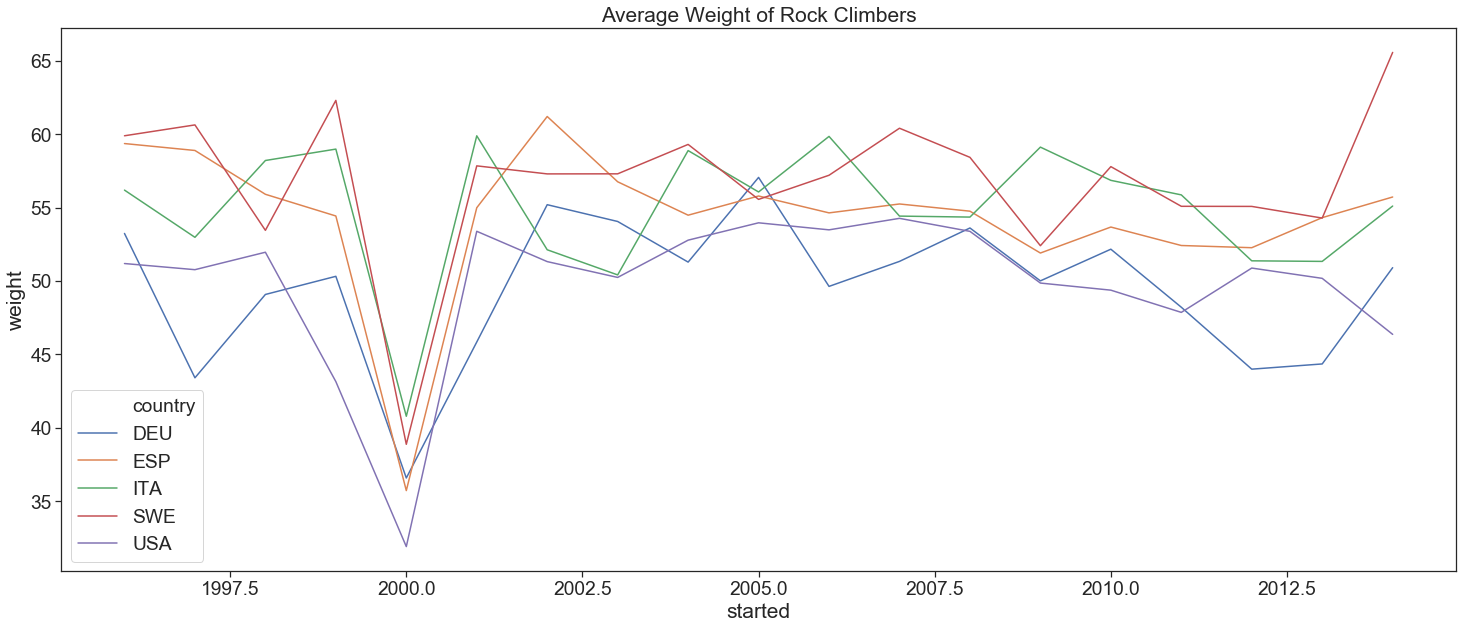

In [414]:
f, ax = plt.subplots(figsize=(25,10))
sns.set(font_scale=1.75)
sns.set_style("white")
sns.set_style("ticks")
Weight_trend=sns.lineplot(x="started", y="weight", hue = 'country', data=dfClimber_means).set_title("Average Weight of Rock Climbers")

What's interesting about this dataset is that the weights are pretty constantly with no clear differences between countries, 
except they suddenly dropped in 2000, the same year that entries spiked. There are several possible explanations 
Perhaps in 2000, this climbing set partnered with youth climbing groups, and as a result, a bunch of 10-16 year old climbers
got on the set, squewing weight down and pushing entries up.
Perhaps as the site got more popular in 2000 and people started taking their accoutns more seriously and putting in more accurate inforamtion. 
However, this explanation does not seem as likely because the average weight of a person is around 62kg. Rock climbers are 
a bit lighter than the average person due to excellent physical fitness and the advantages to being a lighter person in the sport, 
so it does not seem like the years other than 2000 had bad, careless data entry. 
The most plausable explanation would them be the first; that in 2000 a specific group of people that was far lighter than the pervious
groups of people joined the site. It seems most likly that it was youth, however further investigation should be done.